In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
from google.colab import files
uploaded = files.upload()


Saving data_banknote_authentication.txt to data_banknote_authentication (1).txt


In [33]:
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv("data_banknote_authentication.txt", delimiter=",", header=None)  # You can change delimiter if needed
df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

# Display the first few rows to check the data
df.head(10)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


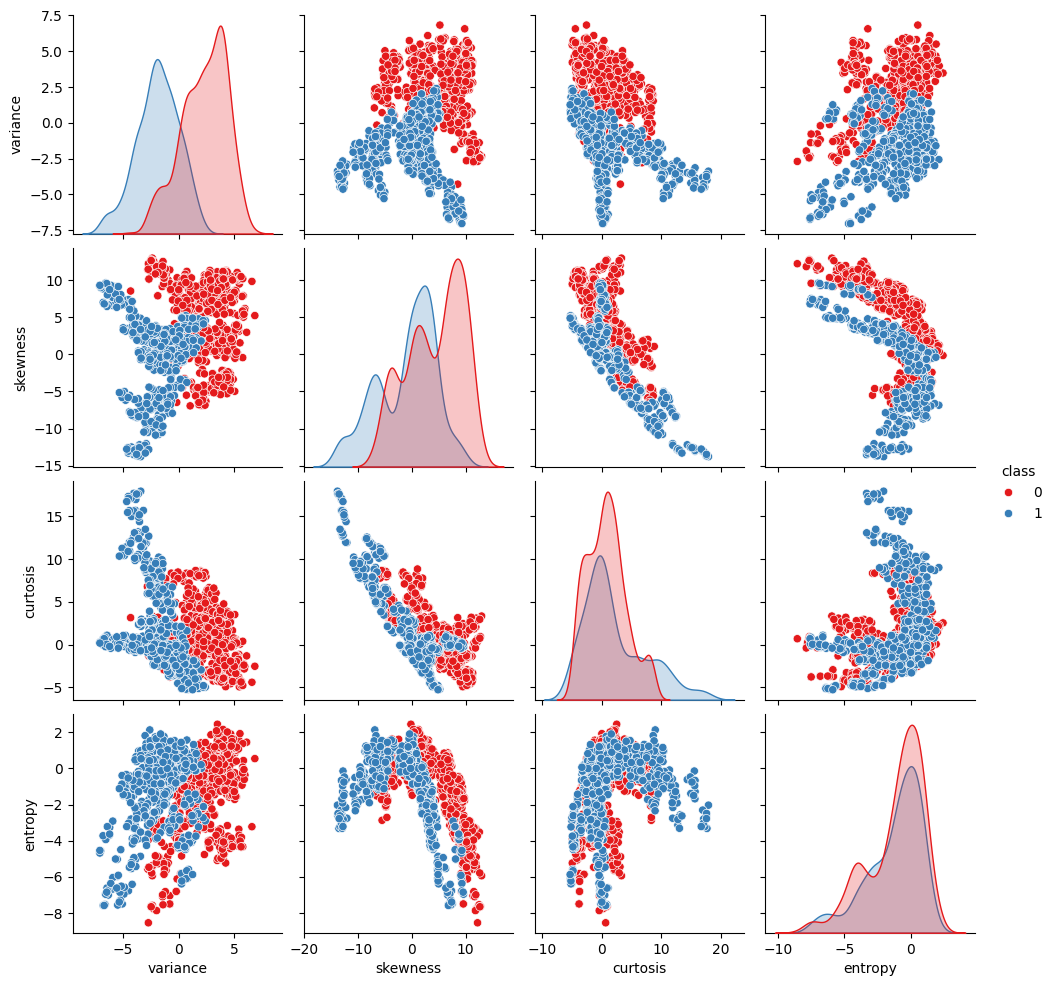

In [34]:
#Visualize the data set
sns.pairplot(df, hue="class", palette="Set1")
plt.show()



In [35]:
from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = df.iloc[:, :-1]  # All columns except the last one (features)
y = df.iloc[:, -1]   # Last column (target labels)


# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=0)


print(X_train,X_test,y_train,y_test)


# Check the split sizes
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


      variance   skewness  curtosis   entropy
1326  -1.29430   2.673500 -0.840850 -2.032300
1109  -0.40857   3.097700 -2.960700 -2.689200
1139  -1.52280  -6.478900  5.756800  0.873250
657   -0.27800   8.188100 -3.133800 -2.527600
704    3.70220   6.994200 -1.851100 -0.128890
...        ...        ...       ...       ...
763    0.39012  -0.142790 -0.031994  0.350840
835   -0.94255   0.039307 -0.241920  0.315930
1216   0.60050   0.999450 -2.212600  0.097399
559    2.01650  -0.252460  5.170700  1.076300
684   -2.07590  10.822300  2.643900 -4.837000

[1097 rows x 4 columns]       variance   skewness  curtosis  entropy
1023  -1.77130 -10.766500  10.21840 -1.00430
642    5.13210  -0.031048   0.32616  1.11510
1196  -2.01490   3.687400  -1.93850 -3.89180
31     1.48840   3.627400   3.30800  0.48921
253    5.28680   3.257000  -1.37210  1.16680
...        ...        ...       ...      ...
1342  -1.74790  -5.823000   5.86990  1.21200
251    0.57461  10.110500  -1.69170 -4.39220
1256  -2.16520   3

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the Decision Tree classifier with custom parameters
clf = DecisionTreeClassifier(max_depth=8, min_samples_split=3, criterion="entropy", random_state=0)

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model again
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



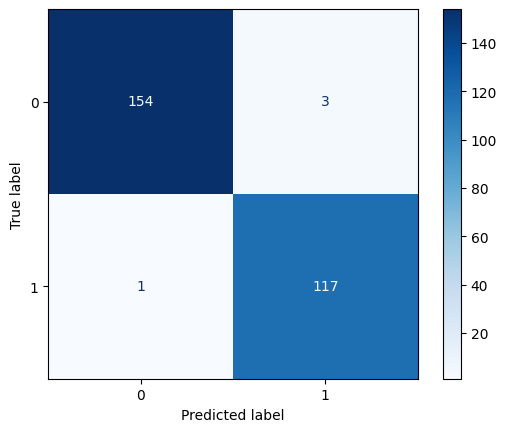

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap="Blues")
plt.show()


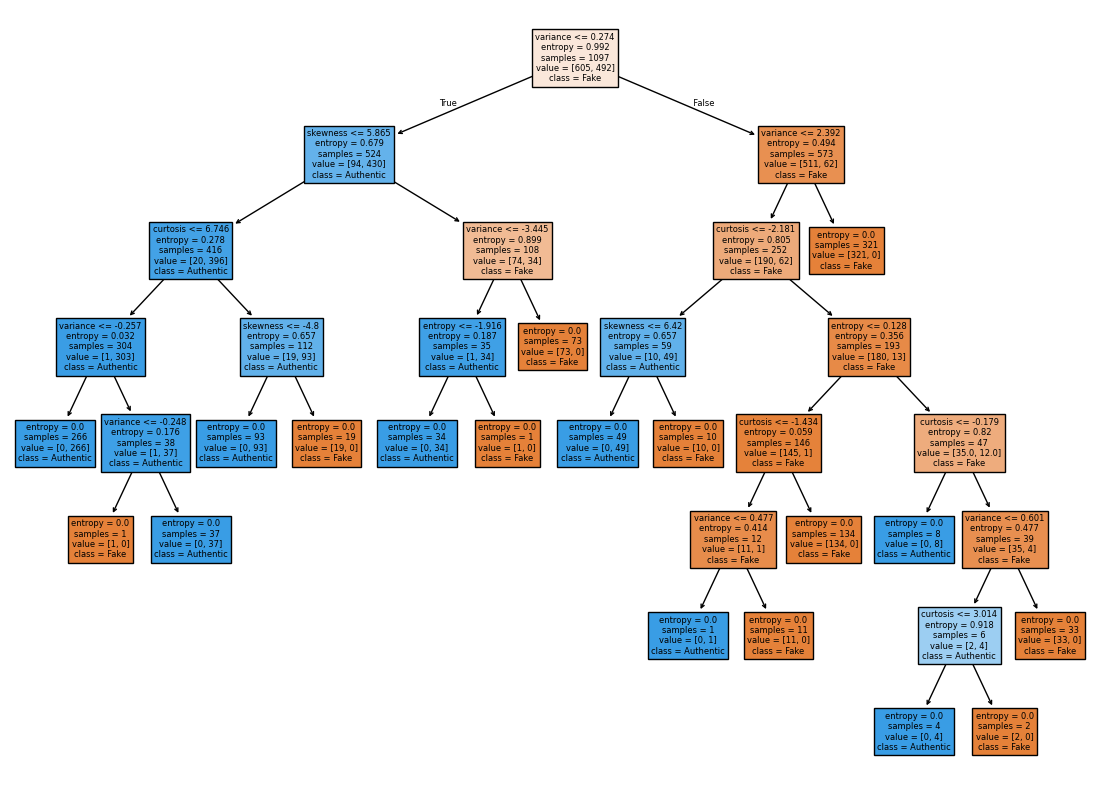

In [38]:
from sklearn.tree import plot_tree

# Plot the trained decision tree
plt.figure(figsize=(14,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Fake", "Authentic"])
plt.show()


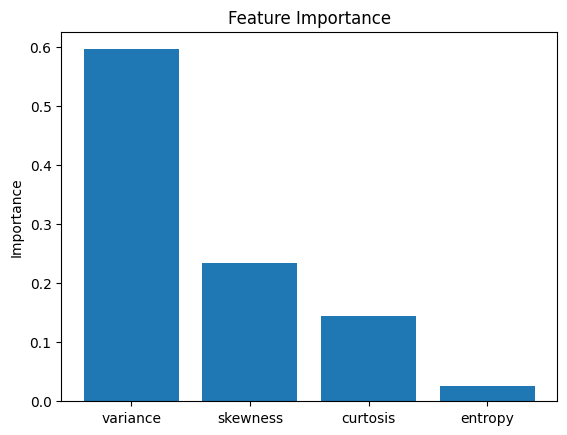

In [39]:
# Extract the feature importance
importances = clf.feature_importances_

# Create a bar plot for feature importance
plt.bar(X.columns, importances)
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()
